# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**Bank Transaction Dataset** merupakan sekumpulan data yang berisi tentang perilaku transaksi dan pola aktivitas keuangan, yang sangat berguna untuk eksplorasi deteksi penipuan (fraud detection) dan identifikasi anomali. Dataset ini terdiri dari `2.512 sampel data transaksi`, mencakup berbagai atribut transaksi, demografi pelanggan, serta pola penggunaan.

`Setiap entri dalam dataset ini merepresentasikan satu transaksi yang dilakukan oleh pelanggan`, mencakup informasi tentang jumlah transaksi, lokasi, perangkat yang digunakan, serta saluran pembayaran. Dengan berbagai fitur yang tersedia, dataset ini dapat digunakan untuk analisis pola transaksi keuangan, mendeteksi potensi aktivitas mencurigakan, serta membangun model prediktif untuk meningkatkan keamanan finansial.

**Fitur Utama dalam Dataset:**
- `TransactionID`: Identifikasi unik untuk setiap transaksi.
- `AccountID`: Identifikasi unik untuk akun pelanggan, dengan kemungkinan lebih dari satu transaksi per akun.
- `TransactionAmount`: Nilai nominal dari setiap transaksi, berkisar dari pengeluaran kecil hingga pembelian dalam jumlah besar (satuan dollar)
- `TransactionDate`: Waktu transaksi dilakukan (tanggal dan jam).
- `TransactionType`: Jenis transaksi (Credit atau Debit).
- `Location`: Lokasi geografis tempat transaksi dilakukan (nama kota di AS).
- `DeviceID`: Identifikasi unik perangkat yang digunakan dalam transaksi.
- `IP Address`: Alamat IP terkait dengan transaksi, yang dapat berubah untuk beberapa akun.
- `MerchantID`: Identifikasi unik pedagang (merchant), menunjukkan transaksi di merchant yang sering digunakan atau yang tidak biasa bagi akun tertentu.
- `AccountBalance`: Saldo akun setelah transaksi dilakukan, yang berkorelasi dengan jenis dan jumlah transaksi.
- `PreviousTransactionDate`: Waktu transaksi terakhir yang dilakukan oleh akun, berguna untuk menghitung frekuensi transaksi.
- `Channel`: Saluran transaksi (misalnya Online, ATM, Branch).
- `CustomerAge`: Usia pemilik akun, yang memiliki keterkaitan dengan jenis pekerjaan dan pola pengeluaran.
- `CustomerOccupation`: Pekerjaan pemilik akun (Doctor, Engineer, Student, Retired), yang dapat mencerminkan pola pemasukan dan pengeluaran.
- `TransactionDuration`: Lama waktu transaksi dalam detik, yang bervariasi tergantung jenis transaksi.
- `LoginAttempts`: Jumlah percobaan login sebelum transaksi dilakukan, dengan nilai tinggi yang bisa mengindikasikan potensi aktivitas mencurigakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
# from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **3. Memuat Dataset** (DONE)

Pada tahap ini, Kita perlu memuat dataset ke dalam notebook dalam format CSV dengan menggunakan pustaka `pandas` untuk membacanya. Kita akan mengecek beberapa baris awal dataset untuk memahami struktur datanya.

In [68]:
df_transaction = pd.read_csv("Dataset_clustering.csv")
df_transaction

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **4.1. Understanding Data Structures**

In [69]:
df_transaction.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [70]:
df_transaction.describe(include='object')

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,495,2512,2,43,681,592,100,3,4,360
top,TX000001,AC00362,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,1,12,1,1944,70,9,13,45,868,657,16


In [71]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [72]:
print("Jumlah data df yang terdapat missing value:")
df_transaction.isnull().sum()

Jumlah data df yang terdapat missing value:


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [73]:
print("Jumlah Duplikasi pada Data df_transaction:", df_transaction.duplicated().sum())

Jumlah Duplikasi pada Data df_transaction: 0


In [74]:
cate_col = []
num_col = []

for column in df_transaction.columns:
    if df_transaction[column].dtype in ['object']:  # Jika tipe datanya object, maka kategorikal
        cate_col.append(column)
    elif df_transaction[column].dtype in ['int64', 'float64']:  # Jika tipe datanya numerik
        num_col.append(column)

In [75]:
df_numerical = df_transaction.select_dtypes(include='number')
df_categorical = df_transaction.select_dtypes(include='object')

In [76]:
print("List Kolom Numerik:", df_numerical.columns)
print("\nList Kolom Kategorikal:", df_categorical.columns)

List Kolom Numerik: Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

List Kolom Kategorikal: Index(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType',
       'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
       'CustomerOccupation', 'PreviousTransactionDate'],
      dtype='object')


### **4.2. Numerical Features Analysis**

In [90]:
print("List Kolom Numerik:", df_numerical.columns)

List Kolom Numerik: Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')


In [ ]:
def plot_numerical_distribution(df, column_name):
    """
    Menampilkan histogram dan boxplot dari fitur numerik tertentu dalam dataset.
    
    Parameters:
        df (DataFrame): DataFrame yang berisi data transaksi.
        column_name (str): Nama kolom numerik yang ingin divisualisasikan.
    """
    # Palet warna
    custom_palette = sns.color_palette("YlOrBr", 3)
    
    # Membuat subplot dengan 1 baris dan 2 kolom
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(df[column_name], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
    axes[0].set_title(f'Distribution of {column_name}')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')
    axes[0].set_axisbelow(True)
    axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    
    # Boxplot
    sns.boxplot(x=df[column_name], color=custom_palette[2], ax=axes[1])
    axes[1].set_title(f'Box Plot of {column_name}')
    axes[1].set_xlabel(column_name)
    axes[1].set_axisbelow(True)
    axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
    
    # Menyesuaikan tata letak
    plt.tight_layout()
    plt.show()

#### **4.2.1. Distribution `TransactionAmount`** (DONE)

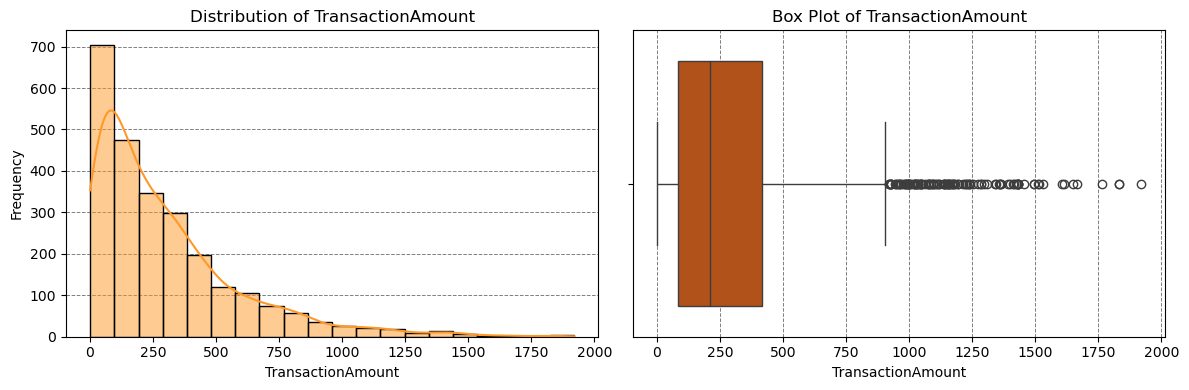


Ringkasan Statistik Untuk TransactionAmount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


In [ ]:
plot_numerical_distribution(df_numerical, 'TransactionAmount')

print(f'\nRingkasan Statistik Untuk TransactionAmount:\n', df_numerical['TransactionAmount'].describe())

**Insight:**
- Rata-rata nilai transaksi (TransactionAmount) berada di sekitar 300 dollar, menunjukkan bahwa sebagian besar transaksi berada di sekitar nilai ini.
- Standar deviasi yang cukup besar mengindikasikan adanya variasi yang signifikan dalam jumlah transaksi, mulai dari nilai yang sangat kecil hingga transaksi dalam jumlah besar.
- Nilai maksimum transaksi yang jauh lebih tinggi dibandingkan rata-rata dapat menunjukkan keberadaan outlier atau memang adanya segmen pelanggan yang melakukan transaksi dalam jumlah besar.
- Histogram menunjukkan distribusi yang miring ke kanan (right-skewed), artinya lebih banyak transaksi bernilai kecil dibandingkan transaksi dengan nilai besar. Hal ini merupakan pola umum dalam data transaksi, di mana sebagian besar pelanggan melakukan transaksi dalam jumlah kecil, sementara hanya sebagian kecil pelanggan yang melakukan transaksi dalam jumlah besar.
- Boxplot menunjukkan banyak titik di luar batas atas, yang mengindikasikan adanya transaksi bernilai tinggi yang dapat dianggap sebagai outlier potensial. Namun, sebelum mengklasifikasikan transaksi ini sebagai anomali atau fraud, perlu dilakukan analisis lebih lanjut untuk memahami apakah transaksi tersebut wajar atau mencurigakan berdasarkan konteks bisnis dan pola transaksi pelanggan.

#### **4.2.2. Distribution `CustomerAge`** (DONE)

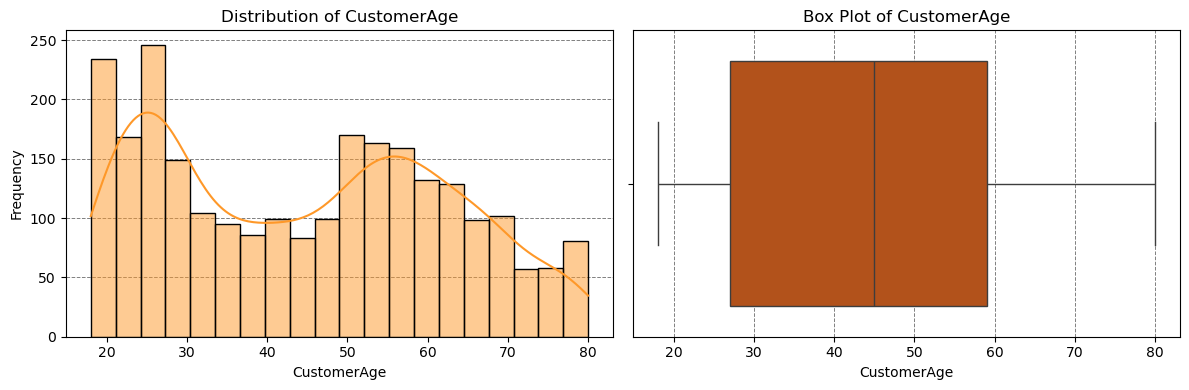


Ringkasan Statistik Untuk CustomerAge:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


In [ ]:
plot_numerical_distribution(df_numerical, 'CustomerAge')

print(f'\nRingkasan Statistik Untuk CustomerAge:\n', df_numerical['CustomerAge'].describe())

**Insight:**
- Rata-rata usia pelanggan sekitar 45 tahun, menunjukkan bahwa mayoritas pelanggan berada di sekitar usia ini.
- Standar deviasi yang cukup besar (17.79 tahun) mengindikasikan adanya variasi usia yang signifikan dalam data.
- Rentang usia pelanggan sangat luas, mulai dari 18 tahun (kemungkinan batas usia minimal untuk menjadi pelanggan) hingga 80 tahun. Hal ini menunjukkan bahwa dataset mencakup pelanggan dari berbagai generasi, yang bisa berpengaruh terhadap pola transaksi dan tingkat risiko fraud.
- Histogram menunjukkan distribusi bimodal, dengan dua puncak utama pada kelompok usia 20-30 tahun dan 50-60 tahun. Ini dapat mengindikasikan adanya dua kelompok pelanggan dominan dengan karakteristik transaksi yang berbeda.
- Boxplot tidak menunjukkan outlier yang signifikan, yang berarti distribusi usia pelanggan relatif stabil tanpa adanya nilai ekstrem yang mencurigakan.
- Sebaran usia yang luas dapat membantu dalam analisis segmentasi risiko fraud, karena pola transaksi kemungkinan berbeda antar kelompok usia. Misalnya, pelanggan muda mungkin lebih sering bertransaksi dalam jumlah kecil, sedangkan pelanggan yang lebih tua cenderung melakukan transaksi dalam jumlah lebih besar tetapi dengan frekuensi yang lebih rendah. 

#### **4.2.3. Distribution `TransactionDuration`** (DONE)

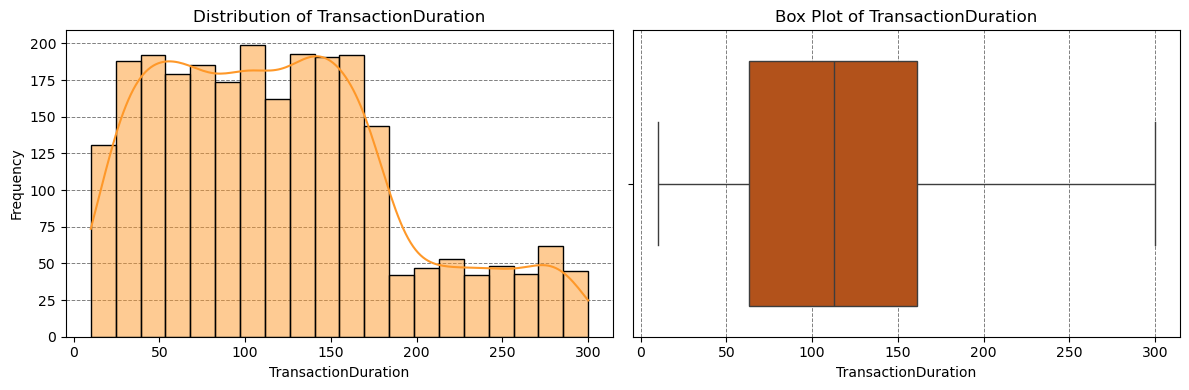


Ringkasan Statistik Untuk TransactionDuration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


In [ ]:
plot_numerical_distribution(df_numerical, 'TransactionDuration')

print(f'\nRingkasan Statistik Untuk TransactionDuration:\n', df_numerical['TransactionDuration'].describe())

**Insight:**
- Distribusi `TransactionDuration` menunjukkan pola yang cukup merata hingga sekitar 150 detik, kemudian mengalami penurunan. Hal ini mengindikasikan bahwa sebagian besar transaksi diselesaikan dalam waktu yang relatif singkat, tetapi masih terdapat sejumlah transaksi dengan durasi lebih lama. Puncak distribusi yang tersebar luas menandakan tidak adanya batas waktu transaksi yang sangat spesifik. Oleh karena itu, perlu diteliti lebih lanjut apakah durasi transaksi tertentu lebih sering dikaitkan dengan aktivitas fraud.
- Rata-rata durasi transaksi sekitar 2 menit (119.64 detik), dengan standar deviasi 69.96 detik, yang menunjukkan adanya variasi signifikan dalam lama transaksi. Perbedaan durasi ini kemungkinan dipengaruhi oleh faktor seperti jenis transaksi, metode pembayaran, atau kebijakan keamanan yang diterapkan. Variasi ini dapat menjadi indikator bahwa beberapa transaksi memerlukan waktu lebih lama, misalnya karena adanya proses verifikasi tambahan atau langkah manual yang harus diselesaikan.
- Durasi transaksi berkisar antara 10 detik hingga 5 menit (300 detik). Transaksi yang berlangsung sangat cepat (hanya 10 detik) dapat menjadi indikasi fraud, terutama jika terjadi dalam jumlah besar dan berulang dalam waktu singkat. Sebaliknya, transaksi yang berlangsung lebih lama dari biasanya (mendekati 5 menit) bisa menandakan adanya proses manual, pemeriksaan tambahan, atau bahkan strategi yang dilakukan pelaku fraud untuk menghindari deteksi otomatis dengan berpura-pura melakukan transaksi secara normal.

#### **4.2.4. Distribution `LoginAttempts`** (FIX)

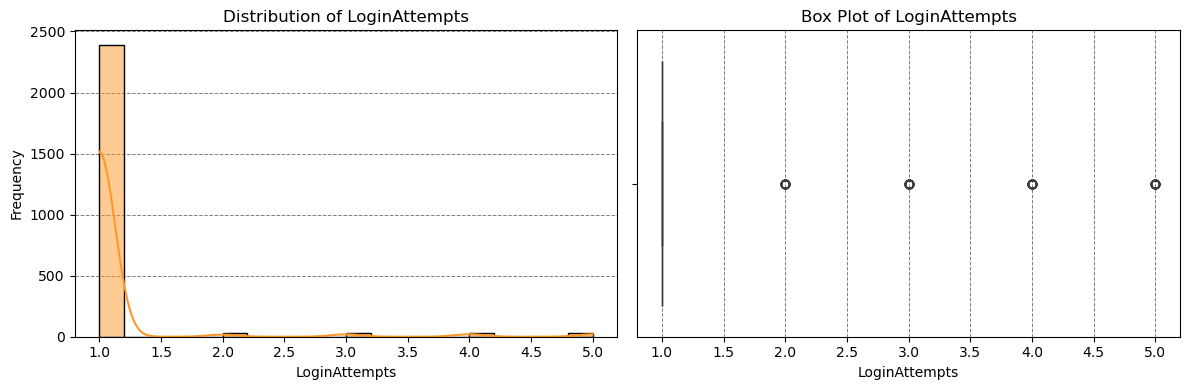


Ringkasan Statistik Untuk LoginAttempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


In [ ]:
plot_numerical_distribution(df_numerical, 'LoginAttempts')

print(f'\nRingkasan Statistik Untuk LoginAttempts:\n', df_numerical['LoginAttempts'].describe())

**Insight:**
- Distribusi `LoginAttempts` menunjukkan mayoritas pengguna hanya melakukan satu kali percobaan login sebelum transaksi dilakukan. Sebagian besar nilai berada di angka 1, seperti yang ditunjukkan oleh histogram dan statistik deskriptif (mean = 1.12, median = 1, Q1 = 1, Q3 = 1).
- Percobaan login lebih dari satu kali (terutama di atas 2) dapat menjadi indikator aktivitas mencurigakan. Meskipun hanya sedikit yang memiliki lebih dari satu percobaan, nilai hingga 5 kali percobaan menandakan ada individu yang gagal login beberapa kali sebelum berhasil melakukan transaksi. Ini bisa mengindikasikan akun yang hampir diretas atau upaya brute force login yang berhasil pada percobaan terakhir.
- Box plot menunjukkan bahwa semua nilai di atas 1 dianggap outlier, yang berarti login berulang relatif jarang terjadi tetapi bisa menjadi sinyal adanya anomali. Dalam konteks fraud detection, transaksi yang dilakukan setelah banyak percobaan login gagal bisa diperiksa lebih lanjut untuk mendeteksi kemungkinan penyalahgunaan akun.

#### **4.2.5. Distribution `AccountBalance`** (FIX)

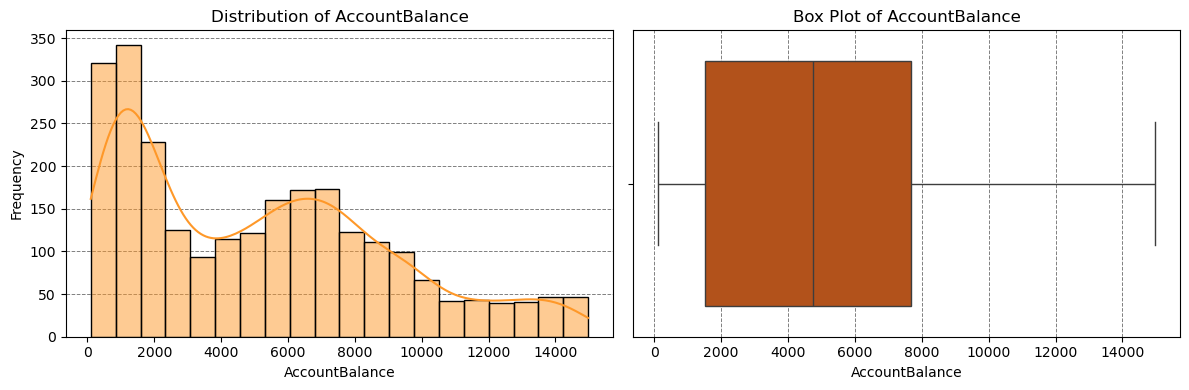


Ringkasan Statistik Untuk AccountBalance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [ ]:
plot_numerical_distribution(df_numerical, 'AccountBalance')

print(f'\nRingkasan Statistik Untuk AccountBalance:\n', df_numerical['AccountBalance'].describe())

**Insight:**
- Distribusi saldo akun setelah transaksi memiliki pola yang tidak simetris, dengan sebagian besar saldo terkonsentrasi di bawah 2.000 tetapi juga terdapat distribusi yang lebih merata pada saldo lebih tinggi. Distribusi ini menunjukkan bahwa mayoritas pengguna memiliki saldo rendah setelah transaksi, meskipun ada beberapa yang memiliki saldo lebih tinggi.
- Nilai tengah (median) sebesar 4.735,51 menunjukkan bahwa separuh akun memiliki saldo di bawah angka ini setelah transaksi. Namun, standar deviasi yang tinggi (3.900,94) menunjukkan adanya variasi yang cukup besar dalam saldo akun antar pengguna.
- Histogram menunjukkan dua pola utama:
     1. Sebagian besar pengguna memiliki saldo rendah setelah transaksi (terutama di bawah 2.000), yang bisa menunjukkan transaksi dengan jumlah besar atau akun dengan dana terbatas.
     2. Distribusi kedua antara 6.000 - 8.000 yang cukup signifikan, yang mungkin berasal dari pola transaksi tertentu seperti batas saldo minimum atau kebijakan tertentu dalam sistem. 
- Box plot tidak menunjukkan banyak outlier, tetapi distribusi saldo cukup lebar, mulai dari 101,25 hingga 14.977,99. Perlu dilakukan analisis lebih lanjut untuk melihat apakah saldo sangat rendah atau sangat tinggi memiliki hubungan dengan fraud atau pola transaksi yang tidak biasa.

### **4.3. Categorical Features Analysis**

In [111]:
print("List Kolom Kategorikal:", df_categorical.columns)

List Kolom Kategorikal: Index(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType',
       'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
       'CustomerOccupation', 'PreviousTransactionDate'],
      dtype='object')


In [127]:
def plot_categorical_distribution(df, column_name, ylabel):
    """
    Menampilkan countplot dan pie chart dari fitur kategorikal dalam dataset.
    
    Parameters:
        df (DataFrame): DataFrame yang berisi data transaksi.
        column_name (str): Nama kolom kategorikal yang ingin divisualisasikan.
    """
    # Hitung distribusi kategori
    category_counts = df[column_name].value_counts()
    categories = category_counts.index
    counts = category_counts.values

    # Palet warna
    custom_palette = sns.color_palette("YlOrBr", len(categories))
    
    # Membuat subplot dengan 1 baris dan 2 kolom
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))
    
    # Countplot
    sns.countplot(data=df, x=column_name, palette=custom_palette, ax=axes[0])
    axes[0].set_title(f'Distribution of {column_name}')
    axes[0].set_xlabel(ylabel)
    axes[0].set_ylabel('Jumlah Transaksi')
    axes[0].set_xticklabels(categories, rotation=45)
    axes[0].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

    # Pie chart
    axes[1].pie(counts, labels=categories, autopct='%1.1f%%', colors=custom_palette, startangle=90, wedgeprops={'edgecolor': 'black'})
    axes[1].set_title(f'Pie Chart of {column_name}')
    
    # Menyesuaikan tata letak
    plt.tight_layout()
    plt.show()

#### **4.3.1. Distribution `TransactionType`**

C:\Users\User\AppData\Local\Temp\ipykernel_2056\2386814661.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette=custom_palette, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_2056\2386814661.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(categories, rotation=45)


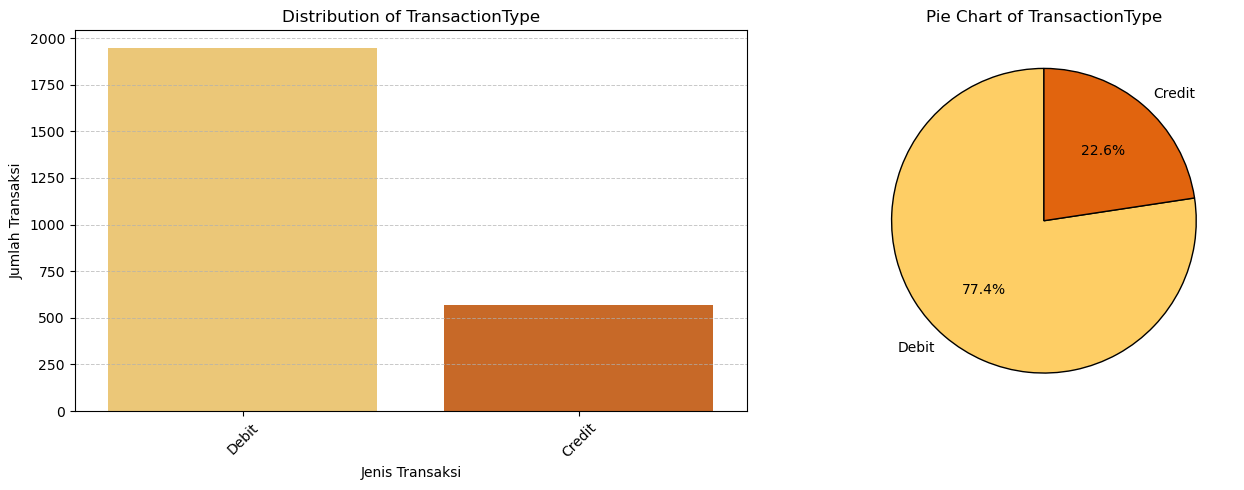


Ringkasan Statistik Untuk TransactionType:
 count      2512
unique        2
top       Debit
freq       1944
Name: TransactionType, dtype: object


In [126]:
plot_categorical_distribution(df_categorical, 'TransactionType', 'Jenis Transaksi')

print(f'\nRingkasan Statistik Untuk TransactionType:\n', df_categorical['TransactionType'].describe(include='object'))

#### **4.3.2. Distribution `Location`**

C:\Users\User\AppData\Local\Temp\ipykernel_2056\1994626551.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette=custom_palette, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_2056\1994626551.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(categories, rotation=45)


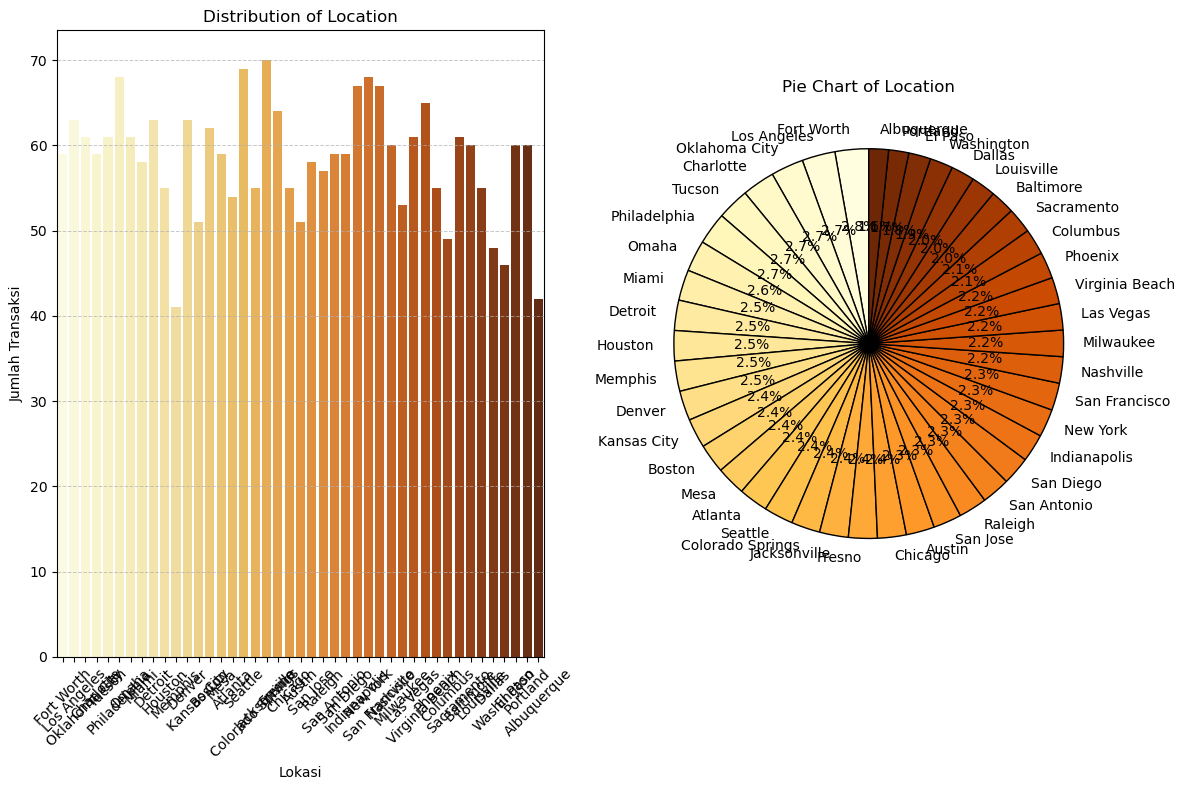


Ringkasan Statistik Untuk Location:
 count           2512
unique            43
top       Fort Worth
freq              70
Name: Location, dtype: object


In [133]:
plot_categorical_distribution(df_categorical, 'Location', 'Lokasi')

print(f'\nRingkasan Statistik Untuk Location:\n', df_categorical['Location'].describe(include='object'))

#### **4.3.3. Distribution `Channel`**

C:\Users\User\AppData\Local\Temp\ipykernel_2056\1994626551.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette=custom_palette, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_2056\1994626551.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(categories, rotation=45)


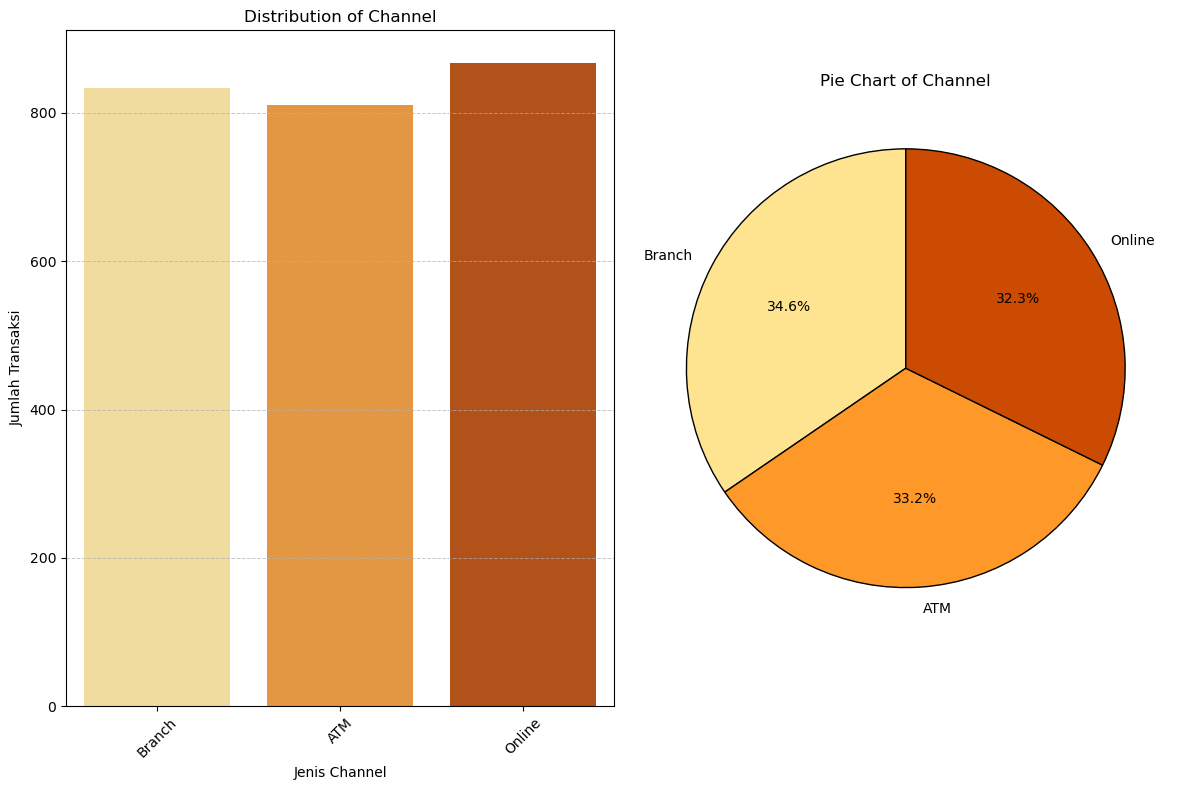


Ringkasan Statistik Untuk Channel:
 count       2512
unique         3
top       Branch
freq         868
Name: Channel, dtype: object


In [131]:
plot_categorical_distribution(df_categorical, 'Channel', 'Jenis Channel')

print(f'\nRingkasan Statistik Untuk Channel:\n', df_categorical['Channel'].describe(include='object'))

#### **4.3.4. Distribution `CustomerOccupation`**

C:\Users\User\AppData\Local\Temp\ipykernel_2056\1994626551.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette=custom_palette, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_2056\1994626551.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(categories, rotation=45)


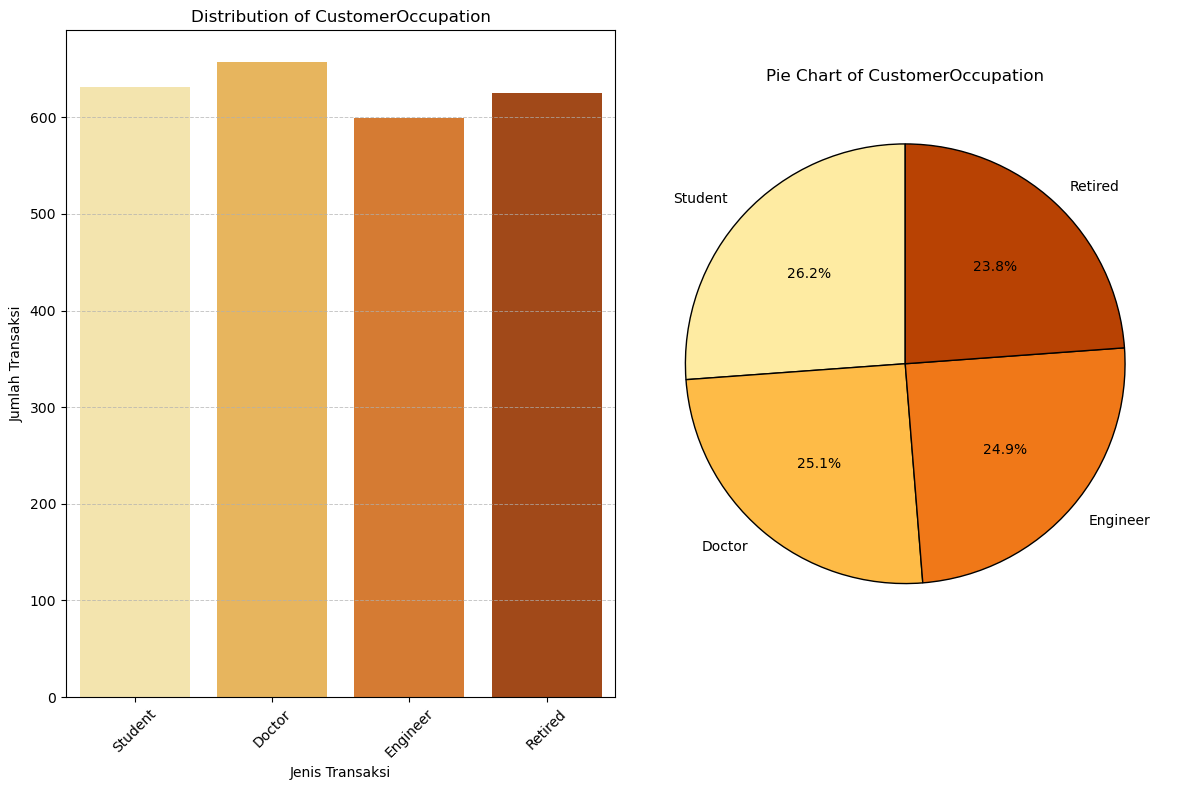


Ringkasan Statistik Untuk CustomerOccupation:
 count        2512
unique          4
top       Student
freq          657
Name: CustomerOccupation, dtype: object


In [134]:
plot_categorical_distribution(df_categorical, 'CustomerOccupation', 'Jenis Transaksi')

print(f'\nRingkasan Statistik Untuk CustomerOccupation:\n', df_categorical['CustomerOccupation'].describe(include='object'))

### **4.4. Correlation Each Variabel**

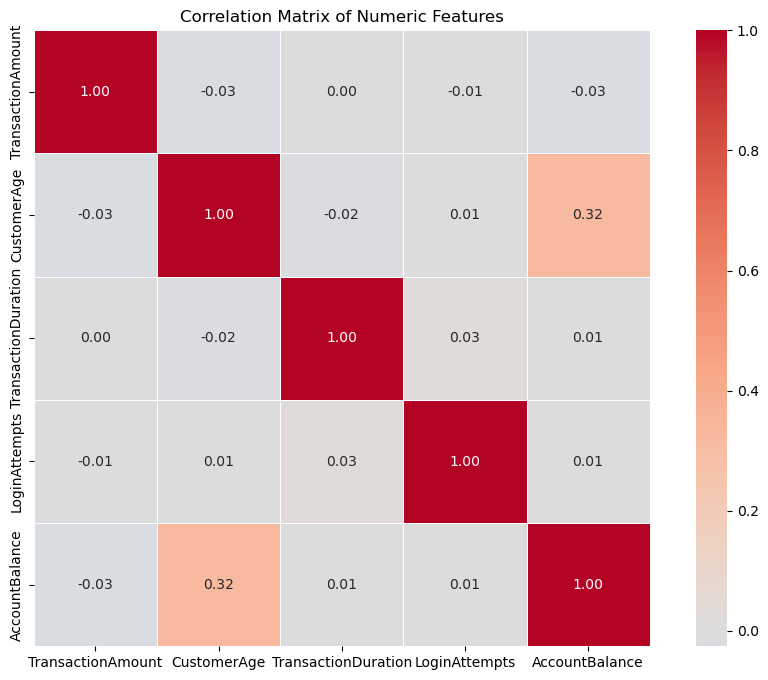

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Correlation Matrix of Numeric Features')

sns.heatmap(df_numerical.corr(),
            square = True,
            fmt=".2f",
            linewidths=0.5,
            annot = True,
            cmap="coolwarm",
            center=0)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [80]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


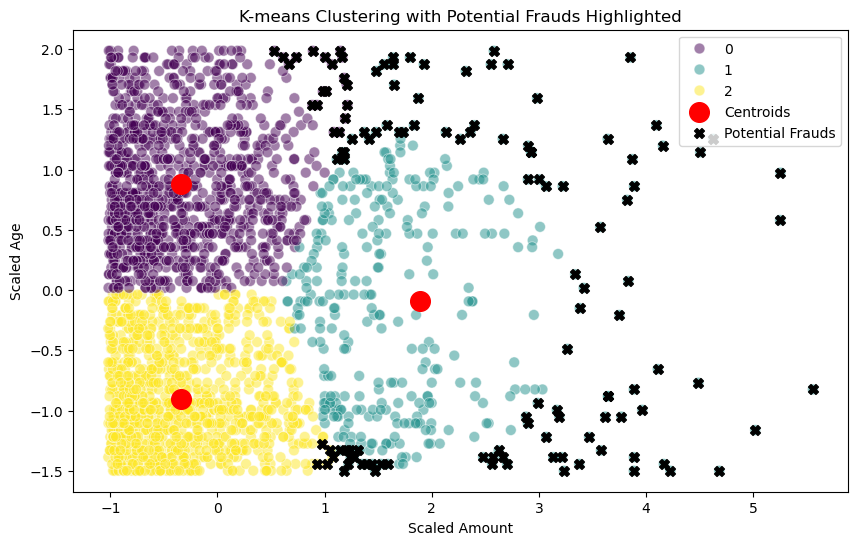

Number of potential frauds detected: 126


In [ ]:
X = df_transaction[['TransactionAmount', 'CustomerAge']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
df_transaction['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
df_transaction['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = df_transaction[df_transaction['Potential_Fraud']]
non_frauds = df_transaction[~df_transaction['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")


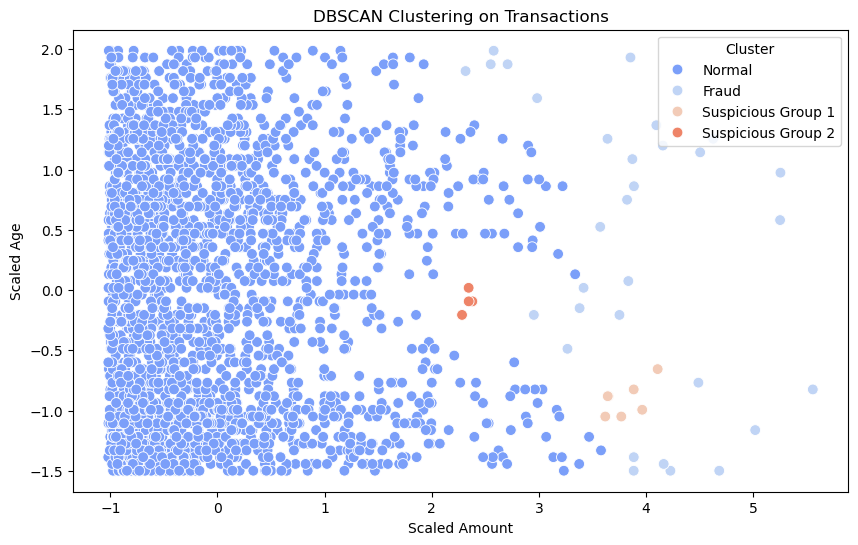

In [137]:
# Adjusted DBSCAN clustering with a refined eps value
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps based on k-distance elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
df_transaction['DBSCAN_Cluster'] = dbscan_labels

# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
df_transaction['DBSCAN_Cluster'] = df_transaction['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_transaction['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [82]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [83]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [84]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [85]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [86]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [87]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.